In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/dataProcessed.csv')

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
Xtrain=X[:100000]
Ytrain=Y[:100000]

In [90]:
data.isnull().sum()

Latitude     0
Longitude    0
A2_RSSI      0
avg_rssi     0
TS           0
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization


model = Sequential()
model.add(BatchNormalization())
model.add(Dense(500, input_dim=5, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(25, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(1,kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam')
history=model.fit(Xtrain,Ytrain,epochs=20, batch_size=64 )

In [92]:
data['DateTime'].max()

'2021-06-24 19:30:07'

In [93]:
X=data[data['DateTime']<'2021-06-24 19:30:07']
X=X['2021-06-01 19:30:07'<X['DateTime']]

In [65]:
tem=data['2021-06-01 00:00:00'<data['DateTime']]
tem=tem[tem['DateTime']<'2021-06-01 23:59:59']

In [67]:
tem['Failure']=0
for i in range(len(tem)):
  if tem['A2_RSSI'].iloc[i]<1.5:
    tem['Failure'].iloc[i]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [69]:
tem.to_csv('current.csv')

In [22]:
temp=X
temp=temp.drop(columns=['Unnamed: 0','TrackSegment','TourID',	'DateTime','Failure','avg_snr','SNR','A2_RSSI'])


In [23]:
y=model.predict(temp)

In [30]:
main=X
main['A2_RSSI']=y
print(X.head())
main.head()

       Unnamed: 0  TrackSegment      TourID             DateTime   Latitude  Longitude   A2_RSSI  SNR  avg_snr  avg_rssi  Failure          TS
93435      772644           323  29909343.0  2021-06-01 19:30:10  47.309187   8.115564  2.076944  0.8     0.69     2.062        0  1622534770
93051      769159           322  29909343.0  2021-06-01 19:30:19  47.310177   8.115105  1.769316  1.0     0.60     1.726        0  1622534779
92667      765673           321  29909343.0  2021-06-01 19:30:56  47.310761   8.114568  1.865812  1.0     0.60     1.830        0  1622534816
92283      762190           320  29909343.0  2021-06-01 19:31:08  47.311649   8.114099  1.732814  1.0     0.80     1.688        0  1622534828
91899      758706           319  29909343.0  2021-06-01 19:31:17  47.312509   8.113830  2.174593  1.0     1.00     2.160        0  1622534837


,Unnamed: 0,TrackSegment,TourID,DateTime,Latitude,Longitude,A2_RSSI,SNR,avg_snr,avg_rssi,Failure,TS
93435,772644,323,29909343.0,2021-06-01 19:30:10,47.309187,8.115564,2.076944,0.8,0.69,2.062,0,1622534770
93051,769159,322,29909343.0,2021-06-01 19:30:19,47.310177,8.115105,1.769316,1.0,0.60,1.726,0,1622534779
92667,765673,321,29909343.0,2021-06-01 19:30:56,47.310761,8.114568,1.865812,1.0,0.60,1.830,0,1622534816
92283,762190,320,29909343.0,2021-06-01 19:31:08,47.311649,8.114099,1.732814,1.0,0.80,1.688,0,1622534828
91899,758706,319,29909343.0,2021-06-01 19:31:17,47.312509,8.113830,2.174593,1.0,1.00,2.160,0,1622534837


In [ ]:
for i in range(len(main)):
  if main['A2_RSSI'].iloc[i]<1.5:
    main['Failure'].iloc[i]=0

In [ ]:
for i in range(len(main)):
  if 1.5<=main['A2_RSSI'].iloc[i]<=1.7:
    main['Failure'].iloc[i]=2

In [34]:
main.to_csv("withpred.csv")

In [84]:
main.to_csv('failuree.csv')

In [ ]:
model.save('model.h5')

Text(0, 0.5, 'RSSI')

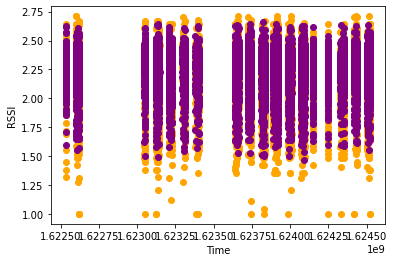

In [99]:
import matplotlib.pyplot as plt
plt.scatter(X['TS'][:15000],X['A2_RSSI'][:15000],color="orange")
plt.scatter(X['TS'][:15000:],y[:15000],color="purple")
plt.xlabel("Time")
plt.ylabel("RSSI")

In [100]:
print(y.max())
print(y.min())

2.5681841
1.4047227
